In [1]:
!pip install tensorflow

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape: (60000, 28, 28)
Training images: 60000
Image height: 28
Image width: 28


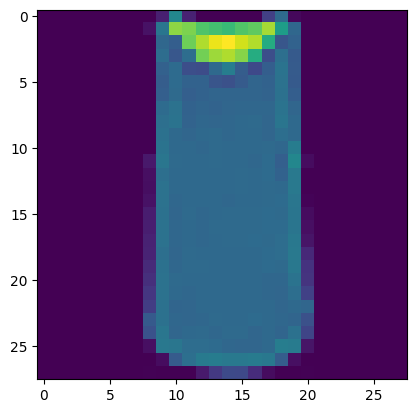

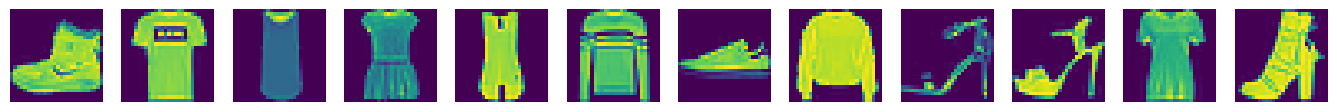

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

num_train_images = X_train.shape[0]
num_test_images = X_test.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape [2]

print("Shape: " + str(X_train.shape))
print("Training images: " + str(num_train_images))
print("Image height: " + str(image_height))
print("Image width: " + str(image_width))

plt.imshow(X_train[2])
fig, axs = plt.subplots(1,12, figsize=(17,6))
for i in range(12):
    axs[i].imshow(X_train[i])
    axs[i].axis('off')
    
NUM_CHANNELS = 1

In [6]:


print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

print("y_train sample 5 value: " + str(y_train[5]))
print("y_train sample 2 value: " + str(y_train[2]))

# Conv2D expects 4 dimmensions; the last one is the number of channels
X_train = X_train.reshape(num_train_images,image_height,
                          image_width,NUM_CHANNELS)
X_test = X_test.reshape(num_test_images,image_height,
                        image_width,NUM_CHANNELS)

X_train = X_train / 255   # values [0..1] improve results
X_test = X_test / 255
    
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)
print("categorical y_train shape: " + str(y_train.shape))
print("categorical y_train sample 5 value: " + str(y_train[5]))
print("categorical y_train sample 2 value: " + str(y_train[2])) 
num_classes = y_test.shape[1]

X_train.shape: (60000, 28, 28, 1)
X_test.shape: (10000, 28, 28, 1)
y_train.shape: (60000,)
y_test.shape: (10000,)
y_train sample 5 value: 2
y_train sample 2 value: 0
categorical y_train shape: (60000, 10)
categorical y_train sample 5 value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
categorical y_train sample 2 value: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot(h):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,EPOCHS)); testing = np.zeros((2,EPOCHS))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss']    # validation loss
    training[ACCURACY] = h.history['accuracy']
    testing[ACCURACY] = h.history['val_accuracy']  # validation accuracy

    epochs = range(1,EPOCHS+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'accuracy')):   
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Test ' + label)
        axs[i].set_title('Training and test ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
    plt.show()
    loss, accuracy = model.evaluate(X_test,y_test,verbose=0)
    print("Loss: " + str(loss))
    print("Accuracy: " + str(accuracy))

#plot(history)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,090 (164.41 KB)

 Trainable params: 42,090 (164.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Dropout: True


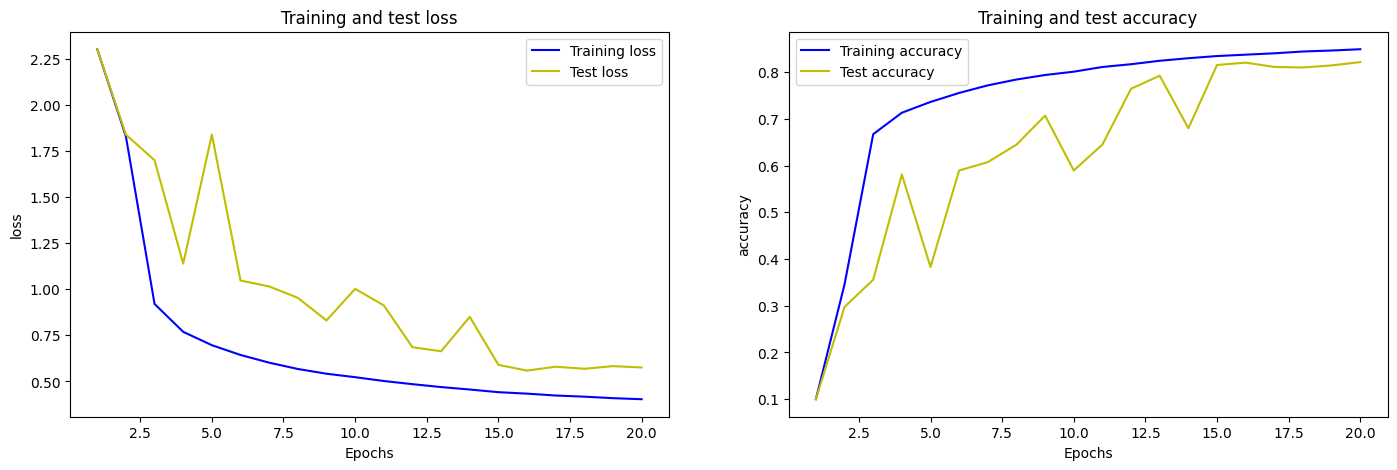

Loss: 0.577491283416748
Accuracy: 0.8216999769210815
Dropout: False


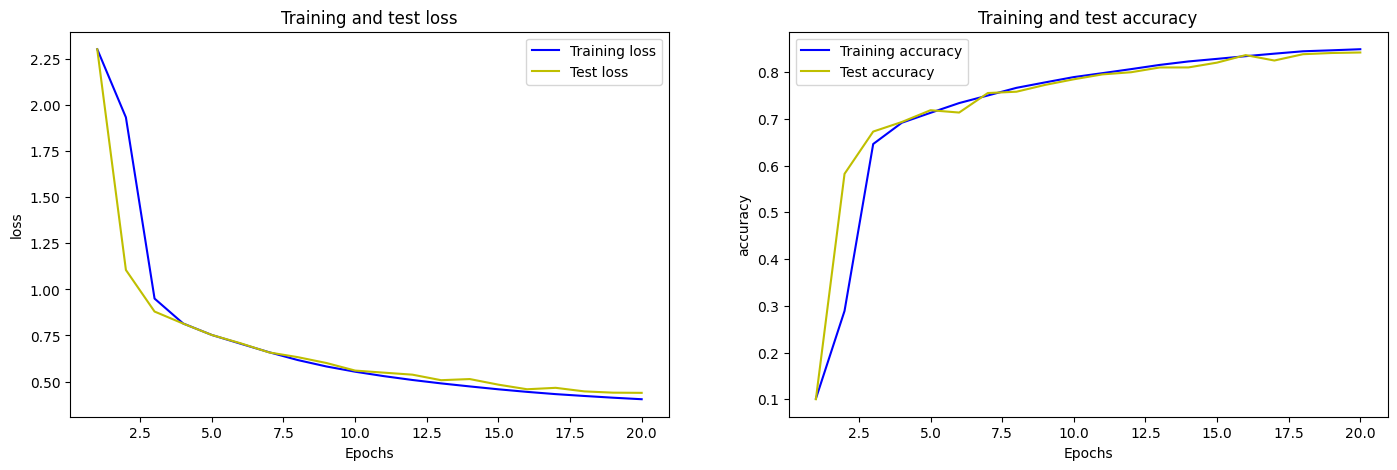

Loss: 0.4418789744377136
Accuracy: 0.8422999978065491


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def set_model(dropout):
    model = Sequential()
    model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=
                            (image_height,image_width,NUM_CHANNELS)))
    if (dropout):
        model.add(layers.Dropout(0.3))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    if (dropout):
        model.add(layers.Dropout(0.3))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))  
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu')) 
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    if (dropout):
        print(model.summary())
  
    return model

EPOCHS = 20
for dropout in [True,False]:
    model = set_model(dropout)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test,
                        y_test), epochs=EPOCHS, batch_size=128, verbose=0)
    print("Dropout: " + str(dropout))
    plot(history)

The provided Python code is using the Keras API from TensorFlow to build, compile, and train a Convolutional Neural Network (CNN) model for image classification. 

The `set_model` function is used to define the architecture of the CNN model. The model is a Sequential model, meaning that it is composed of a linear stack of layers. The `dropout` parameter is used to decide whether to include Dropout layers in the model or not. Dropout is a regularization technique where randomly selected neurons are ignored during training to prevent overfitting.

The model architecture includes three Conv2D layers, each followed by a MaxPooling2D layer. Conv2D layers are convolution layers that will learn the filters that in traditional convolutional neural networks. MaxPooling2D layers are used to reduce the spatial dimensions of the output volume. If `dropout` is True, a Dropout layer with a rate of 0.3 is added after each MaxPooling2D layer. 

After the convolutional and pooling layers, the model has a Flatten layer, which is used to convert the 2D matrix into a 1D vector, and two Dense layers. The final Dense layer uses the softmax activation function, making it suitable for multi-class classification.

The model is then compiled with the 'categorical_crossentropy' loss function, the 'rmsprop' optimizer, and 'accuracy' as the metric to be evaluated during training and testing.

The model is trained using the `fit` method, with the training data `X_train` and `y_train`, and the validation data `X_test` and `y_test`. The number of epochs (complete passes through the entire training dataset) is set to 20, and the batch size (number of samples per gradient update) is set to 128. The `verbose` parameter is set to 0, which means the training process will not output any logs.

The code then prints whether Dropout was used in the model and plots the training history. The `plot` function is not defined in the provided code, but it presumably generates a plot of the training and validation accuracy and/or loss over the epochs. 

The model is trained twice, once with Dropout and once without, to compare the performance of the model with and without Dropout.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 64)       │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,482 (310.48 KB)

 Trainable params: 79,482 (310.48 KB)

 Non-trainable params: 0 (0.00 B)

None


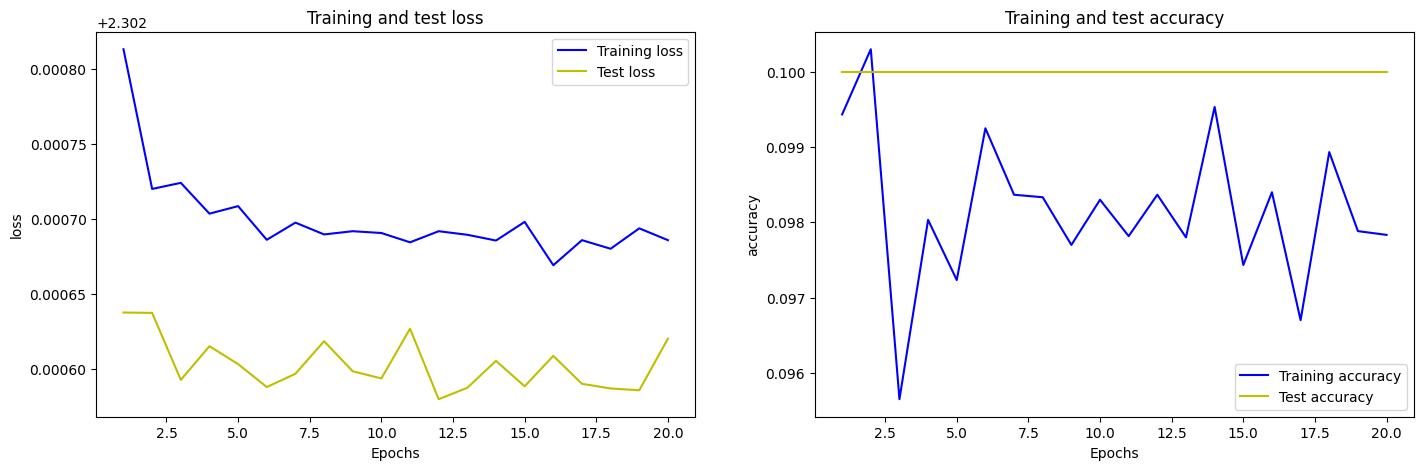

Loss: 2.3025996685028076
Accuracy: 0.10000000149011612


In [12]:


model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_height,image_width,NUM_CHANNELS)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(48, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3,3), activation='relu'))  
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())

EPOCHS = 20
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=128, verbose=0)

plot(history)

The provided code is building and training a Convolutional Neural Network (CNN) model using the Keras API from TensorFlow for a classification task.

The model is initialized using the `Sequential()` function, which allows you to create models layer-by-layer in a step-by-step fashion.

The first layer is a 2D convolutional layer (`Conv2D`) with 32 filters, each of size 3x3. The activation function used is 'relu' (Rectified Linear Unit), and the `input_shape` parameter specifies the shape of the input image. 

The second layer is a 2D max pooling layer (`MaxPooling2D`) with a pool size of 2x2. This layer reduces the spatial dimensions (height, width) of the input volume.

The third layer is another 2D convolutional layer but with 48 filters. 

The fourth layer is another 2D max pooling layer, similar to the second layer.

The fifth layer is a dropout layer (`Dropout`) with a rate of 0.4, which randomly sets a fraction of input units to 0 at each update during training time, helping to prevent overfitting.

The sixth layer is another 2D convolutional layer with 64 filters.

The seventh layer is a flatten layer (`Flatten`), which converts the 2D matrix data into a 1D vector.

The eighth and ninth layers are fully connected layers (`Dense`). The eighth layer has 64 neurons, and the ninth layer has a number of neurons equal to the number of classes in the classification task. The activation function of the final layer is 'softmax', which makes it suitable for multi-class classification.

The `model.summary()` function is then called to print a summary representation of the model.

The model is then compiled with the 'categorical_crossentropy' loss function, 'rmsprop' optimizer, and it will measure 'accuracy' during training.

The model is trained using the `fit` method on the training data with a specified number of epochs and batch size. The `validation_data` parameter is set to the test data to evaluate the loss and any model metrics at the end of each epoch. The `verbose` parameter is set to 0, which means the training process will not output any messages.

The `plot` function is then called with the history of the model training to visualize the training process. This function plots the training and validation loss and accuracy over the epochs. It also evaluates the model on the test data and prints the loss and accuracy.

In [ ]:
#Complete TODO sections in the code below
